<h1>Sales Analysis</h1>

<h3>Import required library</h3>

In [10]:
import pandas as pd
import os

#### Merge 12 months of data in one single file

In [26]:
path_dir = '../../data/files/'

files = [file for file in os.listdir(path_dir)]
sales_files = list()
for file in files:
    if 'Sales' in file:
        sales_files.append(file)

data = pd.DataFrame()

for sale_file in sales_files:
    month_df = pd.read_csv(path_dir+sale_file)
    data = pd.concat([data,month_df])

data.to_csv('all_data.csv', index = False)

#### Read all data into one data frame

In [32]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


## Clean Data

### Drop Nan

In [66]:
## print nan rows
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='any')

### Add some additional columns, like month column

In [72]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",05
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",05
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",05
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",05
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",05


### Month column is broken, Find 'Or' in month column and delete it

In [75]:
#temp_df = all_data[condition]

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### convert the added column to integer

In [76]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


### convert column Quantity Ordered to integer and Price Each to float

In [82]:
# we can also use pd.tonumeric()
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Sale
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


<h4> Question 1: What was the best month for sales? How was earned that month? </h4>

##### 1. Add a month column
##### 2. Add a sales column per item 

In [81]:
all_data['Order Sale'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Sale
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


In [96]:
results = all_data.groupby('Month')[['Quantity Ordered','Order Sale']].sum().astype('int32')
results

,Quantity Ordered,Order Sale
Month,,
1,10903,1822256
2,13449,2202022
3,17005,2807100
4,20558,3390670
5,18667,3152606
6,15253,2577802
7,16072,2647775
8,13448,2244467
9,13109,2097560


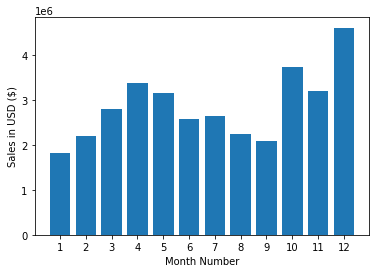

In [102]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results['Order Sale'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#### 2. Which city has the highest number of sales

In [113]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Sale,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle


In [115]:
results_by_city = all_data.groupby('City')[['Quantity Ordered','Order Sale']].sum().astype('int32')
results_by_city

,Quantity Ordered,Order Sale
City,,
Atlanta,16602,2795498
Austin,11153,1819581
Boston,22528,3661642
Dallas,16730,2767975
Los Angeles,33289,5452570
New York City,27932,4664317
Portland,14053,2320490
San Francisco,50239,8262203
Seattle,16553,2747755


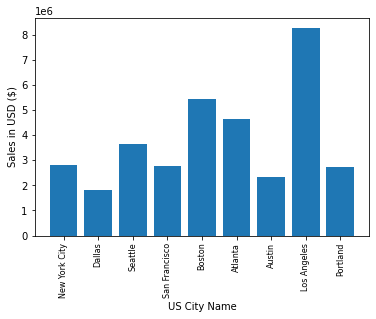

In [121]:
import matplotlib.pyplot as plt

cities = all_data['City'].unique()

plt.bar(cities, results_by_city['Order Sale'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('US City Name')
plt.show()

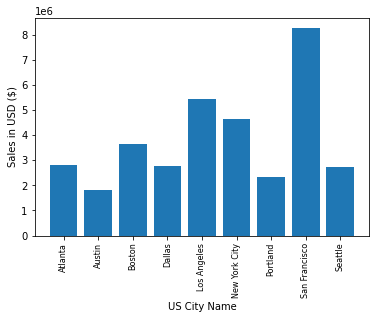

In [123]:
# in above example the order of x values and y values is not same

import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results_by_city['Order Sale'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('US City Name')
plt.show()